In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [5]:
!mkdir data

In [6]:
file_id = '1Z9W4c8n3iALcpibV9v0gZ9_iEeAed8qR'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data/am_pm.csv')

In [7]:
df = pd.read_csv('data/am_pm.csv')

In [8]:
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [9]:
X = df[['am', 'pm']]
y = np.where(df['target'] == 'working_day', 0, 1)

In [10]:
clf = LogisticRegression(random_state=21, fit_intercept=False)

In [11]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
plot_x = np.array([min(df['am']) - 2, max(df['am']) + 2])
plot_y = (-1 / clf.coef_[0][1]) * clf.coef_[0][0] * plot_x

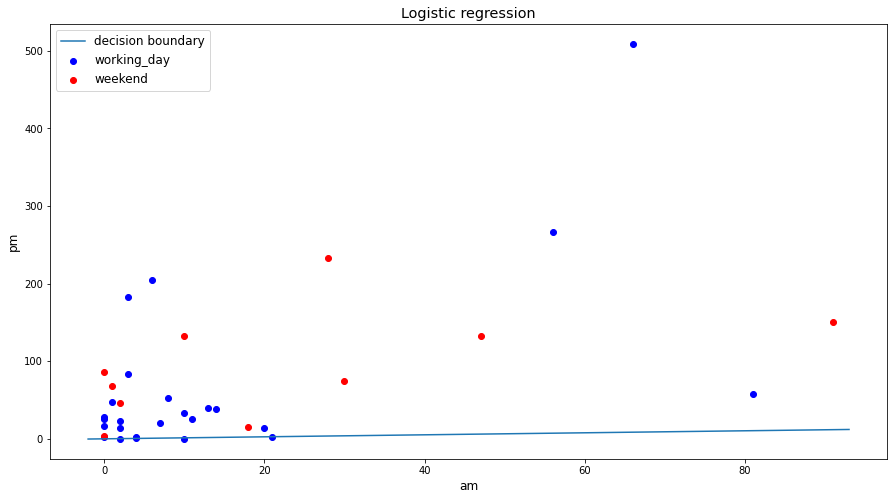

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['target'] == 'working_day']['am'],
           y=df.loc[df['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['target'] == 'weekend']['am'],
           y=df.loc[df['target'] == 'weekend']['pm'],
           color='red', label='weekend')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.set_title('Logistic regression', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

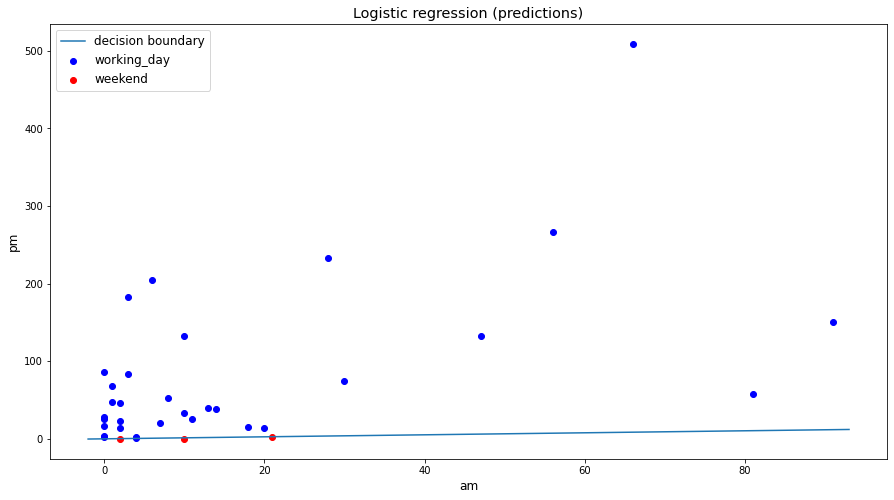

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['predict'] == 'working_day']['am'],
           y=df.loc[df['predict'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['predict'] == 'weekend']['am'],
           y=df.loc[df['predict'] == 'weekend']['pm'],
           color='red', label='weekend')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.set_title('Logistic regression (predictions)', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

In [15]:
y_pred_naive = np.array([np.argmax(np.bincount(y))] * len(y))

In [16]:
accuracy_score(y, y_pred_naive)

0.7142857142857143

In [17]:
scaler = StandardScaler()

In [18]:
df[['am', 'pm']] = scaler.fit_transform(df[['am', 'pm']])

In [19]:
df.head()

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,weekend
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day


In [20]:
X = df[['am', 'pm']]

In [21]:
clf = LogisticRegression(random_state=21, fit_intercept=False)

In [22]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(X)

In [24]:
df['predict'] = np.where(y_pred == 0, 'working_day', 'weekend')

In [25]:
accuracy_score(y, y_pred)

0.7428571428571429

In [26]:
plot_x = np.array([round(min(df['am']), 1), round(max(df['am']), 1)])
plot_y = (-1 / clf.coef_[0][1]) * clf.coef_[0][0] * plot_x

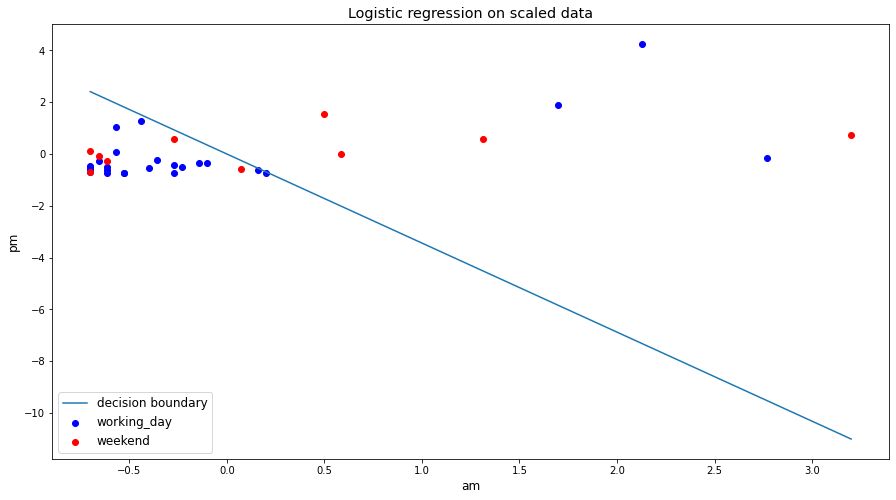

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['target'] == 'working_day']['am'],
           y=df.loc[df['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['target'] == 'weekend']['am'],
           y=df.loc[df['target'] == 'weekend']['pm'],
           color='red', label='weekend')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.set_title('Logistic regression on scaled data', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='lower left', fontsize='large')
plt.show()

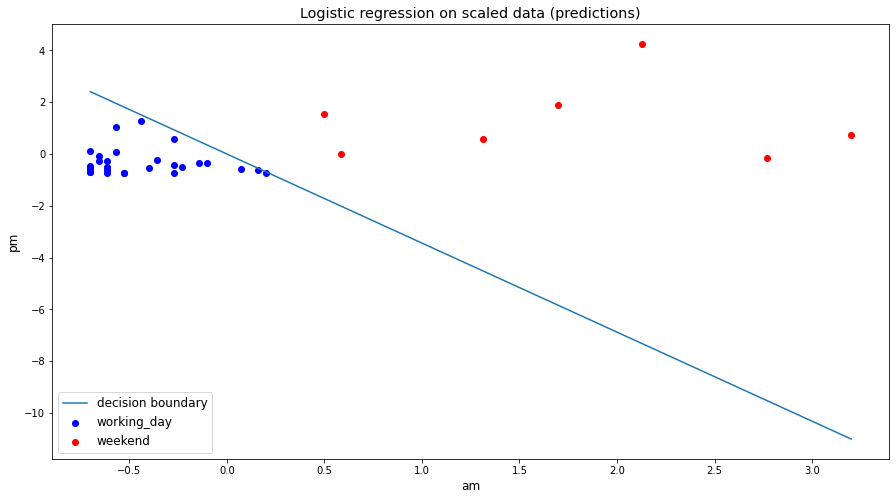

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['predict'] == 'working_day']['am'],
           y=df.loc[df['predict'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['predict'] == 'weekend']['am'],
           y=df.loc[df['predict'] == 'weekend']['pm'],
           color='red', label='weekend')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.set_title('Logistic regression on scaled data (predictions)', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='lower left', fontsize='large')
plt.show()

In [29]:
clf = SVC(probability=True, random_state=21)

In [30]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

cv = GridSearchCV(clf, param_grid, scoring='accuracy')

In [31]:
cv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=21, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
cv.best_params_

{'kernel': 'poly'}

In [33]:
y_pred = cv.predict(X)

In [34]:
df['predict'] = np.where(y_pred == 0, 'working_day', 'weekend')

In [35]:
accuracy_score(y, y_pred)

0.7428571428571429

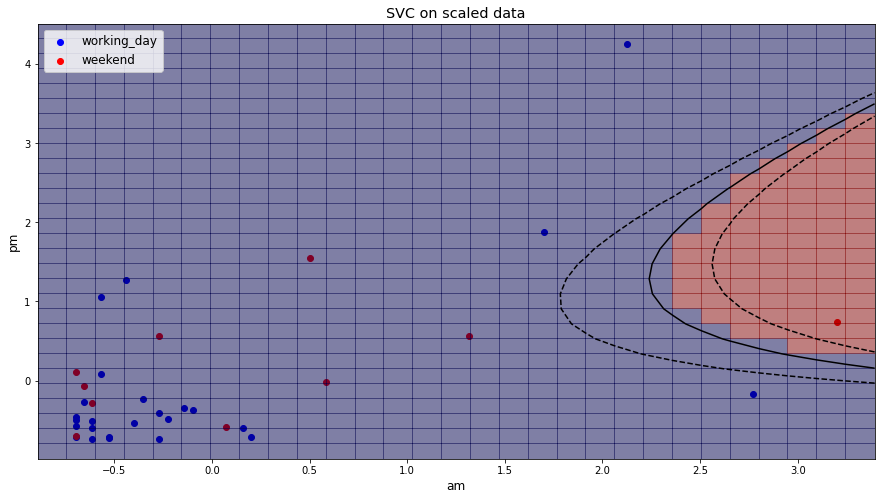

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['target'] == 'working_day']['am'],
           y=df.loc[df['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['target'] == 'weekend']['am'],
           y=df.loc[df['target'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.best_estimator_.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.5, cmap='seismic')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

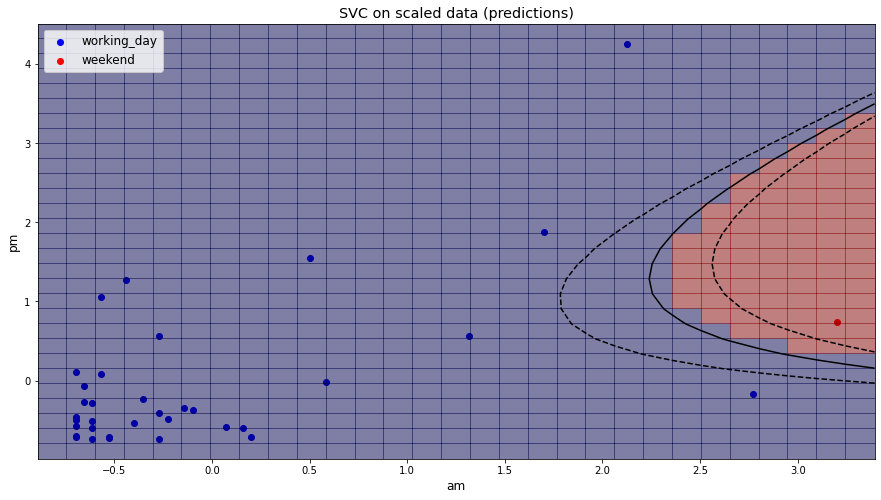

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['predict'] == 'working_day']['am'],
           y=df.loc[df['predict'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['predict'] == 'weekend']['am'],
           y=df.loc[df['predict'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.best_estimator_.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.5, cmap='seismic')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data (predictions)', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

In [38]:
clf = DecisionTreeClassifier(random_state=42)

In [39]:
param_grid = {'max_depth': np.arange(3, 21)}

cv = GridSearchCV(clf, param_grid, scoring='accuracy')

In [40]:
cv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 

In [41]:
cv.best_params_

{'max_depth': 4}

In [42]:
y_pred = cv.predict(X)

In [43]:
df['predict'] = np.where(y_pred == 0, 'working_day', 'weekend')

In [44]:
accuracy_score(y, y_pred)

0.9428571428571428

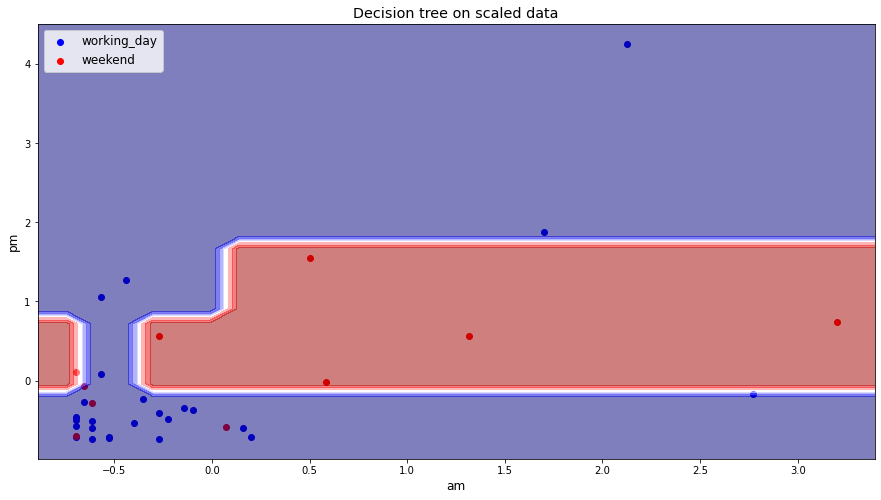

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['target'] == 'working_day']['am'],
           y=df.loc[df['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['target'] == 'weekend']['am'],
           y=df.loc[df['target'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
Z = cv.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
ax.contourf(XX, YY, Z, alpha=0.5, cmap='seismic')
ax.set_title('Decision tree on scaled data', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

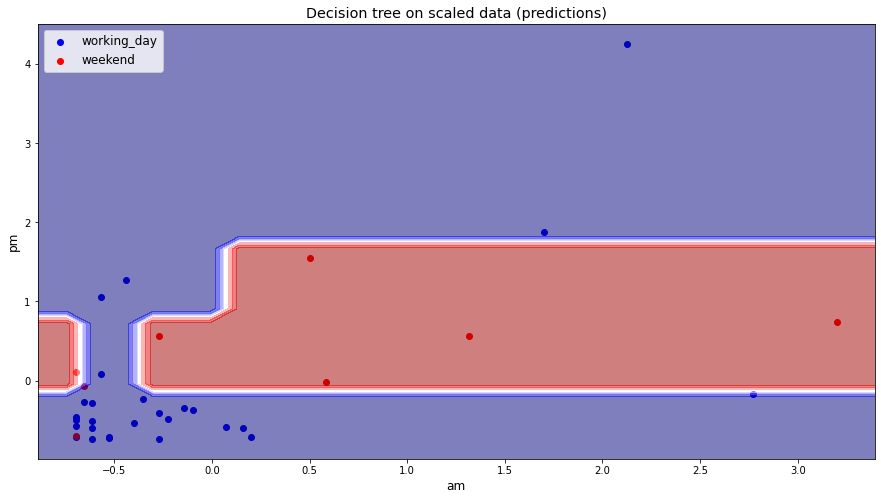

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['predict'] == 'working_day']['am'],
           y=df.loc[df['predict'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['predict'] == 'weekend']['am'],
           y=df.loc[df['predict'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
Z = cv.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
ax.contourf(XX, YY, Z, alpha=0.5, cmap='seismic')
ax.set_title('Decision tree on scaled data (predictions)', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

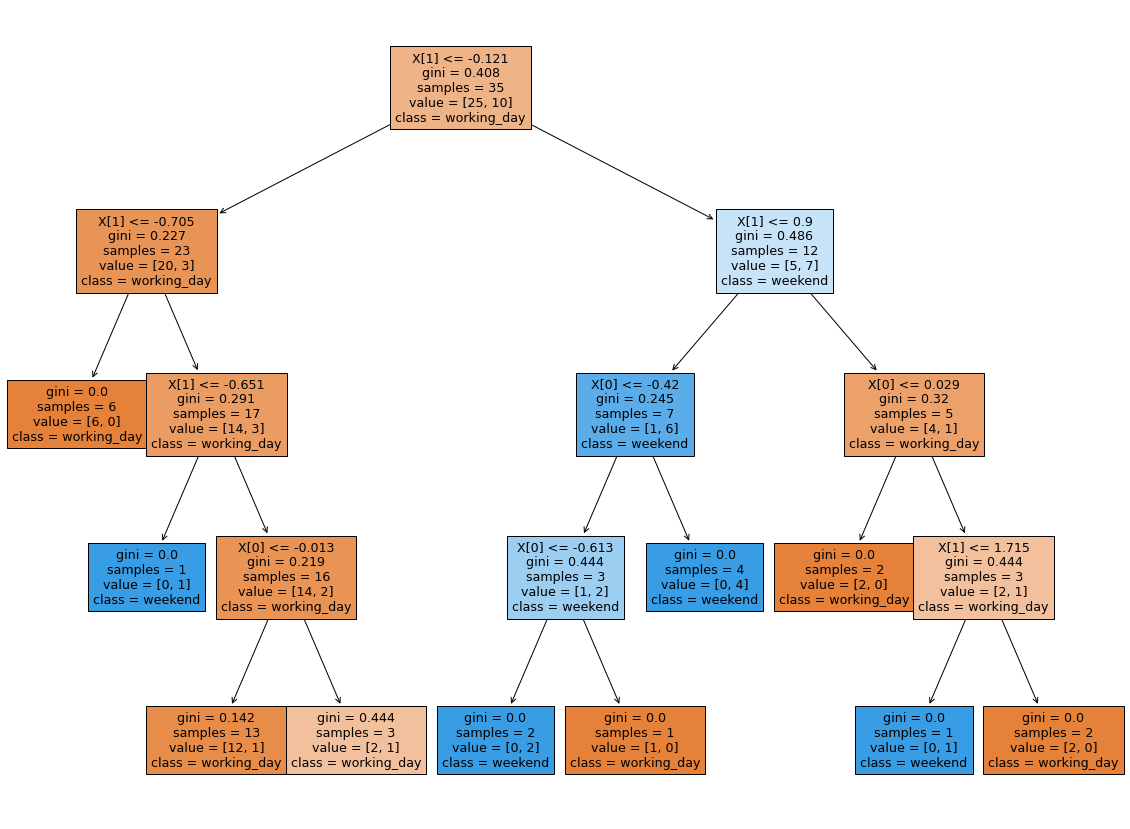

In [50]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(cv.best_estimator_, class_names=['working_day', 'weekend'],
          filled=True, ax=ax)
plt.show()

12 листьев предсказывают класс working_day.